In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('DatosAzcapo.txt',sep=',',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       52179 non-null  object 
 1   1       52179 non-null  object 
 2   2       52179 non-null  float64
 3   3       52179 non-null  float64
 4   4       52179 non-null  float64
 5   5       52179 non-null  float64
 6   6       52179 non-null  float64
 7   7       52179 non-null  float64
 8   8       52179 non-null  float64
 9   9       52179 non-null  float64
 10  10      52179 non-null  float64
 11  11      52179 non-null  float64
 12  12      52179 non-null  float64
dtypes: float64(11), object(2)
memory usage: 5.2+ MB


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4/4/2024 12:00:00 AM,4/4/2024 6:00:00 AM,28.692070,14.742066,13.950004,23.128830,19.350910,77.827011,28.035599,25.874756,33.960640,11.665325,5.025064
1,4/4/2024 12:01:00 AM,4/4/2024 6:01:00 AM,32.022658,14.771019,17.251640,23.148970,19.340763,77.817986,27.919699,25.910034,33.966431,11.671605,5.068029
2,4/4/2024 12:02:00 AM,4/4/2024 6:02:00 AM,32.219123,14.717249,17.501873,23.169109,19.335342,77.820869,27.938000,25.910950,33.988586,11.663702,5.003208
3,4/4/2024 12:03:00 AM,4/4/2024 6:03:00 AM,31.586301,14.659344,16.926957,23.169109,19.330561,77.814812,27.956299,25.925995,33.997185,11.670901,4.931069
4,4/4/2024 12:04:00 AM,4/4/2024 6:04:00 AM,32.534500,14.676922,17.857577,23.199320,19.308531,77.830132,27.956299,25.948059,34.013283,11.678738,5.000206


In [8]:
df['fechas']=pd.to_datetime(df[0])
df=df.set_index('fechas')

<ipython-input-8-f5f18913dd5c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fechas']=pd.to_datetime(df[0])


In [10]:
PM10=df[2]
PM25=df[3]
PMmix=df[4]
Temp=df[6]
Pres=df[7]
RH=df[8]

In [11]:
variable=['$PM_{10}$','$PM_{25}$','$PM_{mix}$','T','P','RH',]
colors=['black','green','red','blue','orange','brown']

In [12]:
Data_in=np.column_stack([Temp,Pres,RH])
Data_out=np.column_stack([PM25])
print(Data_in)
print(len(Data_in))
print(len(Data_out))

[[19.35091019 77.82701111 28.03559875]
 [19.34076309 77.81798553 27.91969872]
 [19.33534241 77.82086945 27.93799973]
 ...
 [27.89101791 78.05047607 26.26659966]
 [27.69476509 78.07154846 25.30279922]
 [27.57023621 78.05378723 24.47929955]]
52179
52179


In [13]:
Data_out.shape[1]

1

In [16]:
#Crear el modelo de TensorFlow
#Definir el modelo secuencial

model=tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation='linear',input_shape=(Data_in.shape[1],)),
    tf.keras.layers.Dense(1,activation='linear')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 16 (64.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Data_in,Data_out,test_size=0.2,random_state=42)

In [26]:
#compilar el modelo
model.compile(optimizer='adam',loss='mean_squared_error')

#Entrenar el modelo
model.fit(X_train,y_train,epochs=50,verbose=2)

Epoch 1/50
1305/1305 - 3s - loss: 119.8935 - 3s/epoch - 2ms/step
Epoch 2/50
1305/1305 - 2s - loss: 119.8228 - 2s/epoch - 1ms/step
Epoch 3/50
1305/1305 - 2s - loss: 119.8277 - 2s/epoch - 1ms/step
Epoch 4/50
1305/1305 - 2s - loss: 119.8585 - 2s/epoch - 2ms/step
Epoch 5/50


KeyboardInterrupt: 

In [24]:
#Se realiza la validacion y predicciones
train_predictions=model.predict(X_train)
print(f'Reproduccion de los datos de entrenamiento:\n{train_predictions}')

print(X_train)

test_predictions=model.predict(X_test)
print(f'Reproduccion de los datos:\n{test_predictions}')

1305/1305 [==============================] - 2s 1ms/step
Reproduccion de los datos de entrenamiento:
[[33.873367]
 [16.309532]
 [34.425648]
 ...
 [33.45542 ]
 [33.610905]
 [36.617943]]
[[24.13035774 77.91934967 29.98759842]
 [16.16941452 78.06840515 21.11209869]
 [27.22885513 77.9575119  29.09699821]
 ...
 [29.92354012 77.6571579  27.24869919]
 [28.40810966 77.73468781 27.99899864]
 [18.40712547 78.08476257 34.29419708]]
327/327 [==============================] - 1s 2ms/step
Reproduccion de los datos:
[[38.601295]
 [38.454853]
 [30.7741  ]
 ...
 [38.26741 ]
 [36.114437]
 [37.29853 ]]


In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

####Interpolacion
mse=mean_squared_error(y_train,train_predictions)
mae=mean_absolute_error(y_train,train_predictions)
r2=r2_score(y_train,train_predictions)
print('Metricas de Interpolacion:')
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"R^2:{r2}")

###Extrapolacion
mse=mean_squared_error(y_test,test_predictions)
mae=mean_absolute_error(y_test,test_predictions)
r2=r2_score(y_test,test_predictions)
print('Metricas de Interpolacion:')
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"R^2:{r2}")

Metricas de Interpolacion:
MSE:119.51418467991486
MAE:8.538648652281626
R^2:0.27121914512642686
Metricas de Interpolacion:
MSE:121.0322114246723
MAE:8.550889103159447
R^2:0.2654203530421485


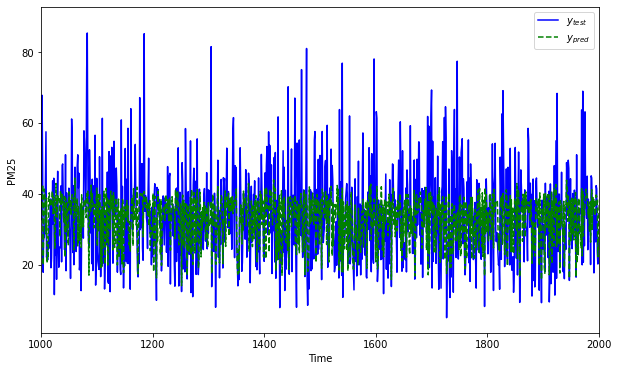

In [34]:
pl=np.vstack((y_train,y_test))

plt.figure(figsize=(10,6))
plt.plot(y_test,'-',color='blue',label='$y_{test}$')
plt.plot(test_predictions,'--',color='green',label='$y_{pred}$')
plt.xlabel('Time')
plt.ylabel('PM25')
plt.xlim(1000,2000)
plt.legend()
plt.show()

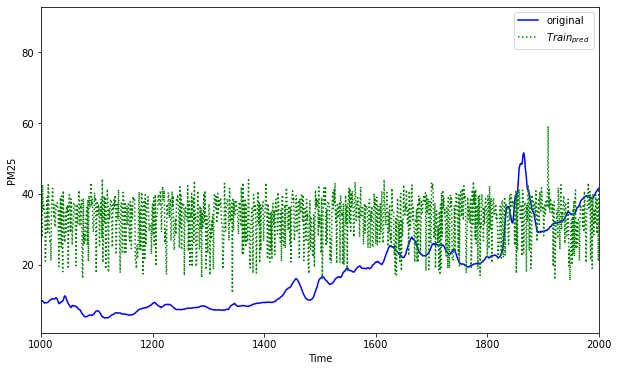

In [36]:
pl1=np.vstack((train_predictions,test_predictions))

plt.figure(figsize=(10,6))
plt.plot(Data_out,'-',color='blue',label='original') ### Data out====> PM25
plt.plot(range(len(y_train)),pl1[:len(y_train)],':',color='green',label='$Train_{pred}$')
plt.xlabel('Time')
plt.ylabel('PM25')
plt.xlim(1000,2000)
plt.legend()
plt.show()

In [45]:
###USANDO OTRO OPTIMIZADOR
model=tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation='linear',input_shape=(Data_in.shape[1],)),
    tf.keras.layers.Dense(1,activation='linear')
])

opt=tf.keras.optimizers.Adagrad(learning_rate=0.1)

model.compile(optimizer=opt,loss='mean_squared_error')

In [46]:
#Entrenar el modelo
model.fit(X_train,y_train,epochs=50,verbose=2)

Epoch 1/50
1305/1305 - 2s - loss: 128.3012 - 2s/epoch - 2ms/step
Epoch 2/50
1305/1305 - 2s - loss: 120.2505 - 2s/epoch - 2ms/step
Epoch 3/50
1305/1305 - 2s - loss: 120.0613 - 2s/epoch - 1ms/step
Epoch 4/50
1305/1305 - 2s - loss: 119.9598 - 2s/epoch - 1ms/step
Epoch 5/50
1305/1305 - 2s - loss: 119.8278 - 2s/epoch - 1ms/step
Epoch 6/50
1305/1305 - 2s - loss: 119.8424 - 2s/epoch - 1ms/step
Epoch 7/50
1305/1305 - 2s - loss: 119.8296 - 2s/epoch - 1ms/step
Epoch 8/50
1305/1305 - 2s - loss: 119.7915 - 2s/epoch - 1ms/step
Epoch 9/50
1305/1305 - 2s - loss: 119.7928 - 2s/epoch - 1ms/step
Epoch 10/50
1305/1305 - 2s - loss: 119.7447 - 2s/epoch - 1ms/step
Epoch 11/50
1305/1305 - 2s - loss: 119.7649 - 2s/epoch - 1ms/step
Epoch 12/50
1305/1305 - 2s - loss: 119.7334 - 2s/epoch - 1ms/step
Epoch 13/50
1305/1305 - 2s - loss: 119.7201 - 2s/epoch - 1ms/step
Epoch 14/50


KeyboardInterrupt: 

In [47]:
#Realizar predicciones
train_predictions=model.predict(X_train)
print(f'Reproduccion de los datos de entrenamiento\n:{train_predictions}')
test_predictions=model.predict(X_test)
print(f'Reproduccion de los datos de entrenamiento\n:{test_predictions}')

1305/1305 [==============================] - 2s 2ms/step
Reproduccion de los datos de entrenamiento
:[[33.338703]
 [15.873144]
 [33.917656]
 ...
 [32.990322]
 [33.127007]
 [35.99124 ]]
327/327 [==============================] - 0s 1ms/step
Reproduccion de los datos de entrenamiento
:[[37.999683]
 [37.82983 ]
 [30.236368]
 ...
 [37.666748]
 [35.606857]
 [36.67663 ]]


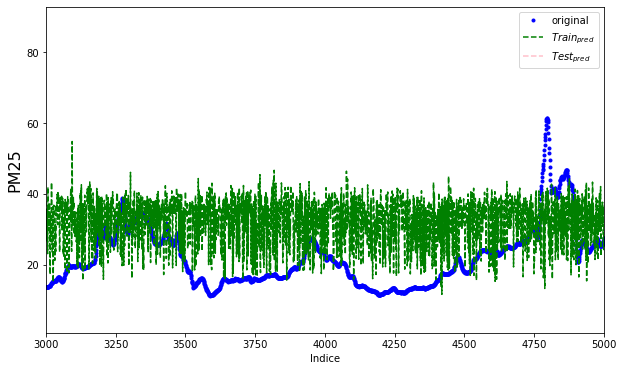

In [51]:
pl1=np.vstack((train_predictions,test_predictions))

plt.figure(figsize=(10,6))
plt.plot(Data_out,'.',color='blue',label='original') ### Data out====> PM25
plt.plot(range(len(y_train)),pl1[:len(y_train)],'--',color='green',label='$Train_{pred}$')
plt.plot(range(len(y_train),len(pl1)),pl1[len(y_train):],'--',color='pink',label='$Test_{pred}$')

plt.xlabel('Indice')
plt.ylabel('PM25', fontsize=16)
plt.xlim(3000,5000)
plt.legend()
plt.show()

In [77]:
###Usar las variables mejor correlacionadas para generar un modelo que reproduzaca el comportamiento de las particulas PM25
Data_in=np.column_stack([RH,PM10,PMmix])


In [78]:
train_split=int(0.7*len(Data_in))
print(train_split)
X_train,y_train=Data_in[0:train_split],Data_out[0:train_split]
X_test,y_test=Data_in[train_split:len(Data_in)],Data_out[train_split:len(Data_in)]

36525


In [79]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(3,activation='linear',input_shape=(Data_in.shape[1],)),
    tf.keras.layers.Dense(1,activation='linear')
])

In [82]:
model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=50,verbose=0)

In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

####Interpolacion
mse=mean_squared_error(y_train,train_predictions)
mae=mean_absolute_error(y_train,train_predictions)
r2=r2_score(y_train,train_predictions)
print('Metricas de Interpolacion:')
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"R^2:{r2}")

###Extrapolacion
mse=mean_squared_error(y_test,test_predictions)
mae=mean_absolute_error(y_test,test_predictions)
r2=r2_score(y_test,test_predictions)
print('Metricas de Interpolacion:')
print(f"MSE:{mse}")
print(f"MAE:{mae}")
print(f"R^2:{r2}")

ValueError: Found input variables with inconsistent numbers of samples: [36525, 41743]

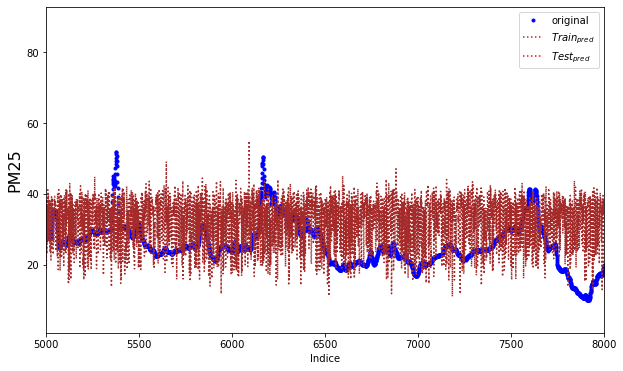

In [90]:
pl1=np.vstack((train_predictions,test_predictions))

plt.figure(figsize=(10,6))
plt.plot(Data_out,'.',color='blue',label='original')
plt.plot(range(len(y_train)),pl1[:len(y_train)],':',color='brown',label='$Train_{pred}$')
plt.plot(range(len(y_train),len(pl1)),pl1[len(y_train):],':',color='red',label='$Test_{pred}$')

plt.xlabel('Indice')
plt.ylabel('PM25', fontsize=16)
plt.xlim(5000,8000)
plt.legend()
plt.show()

In [91]:
###Time Split series
Data_in=np.column_stack([RH,PM10,PMmix])

In [92]:
K_folds=10
Fold_len=len(Data_in)/K_folds
Folds=[]
sets=[]
for k in range (K_folds):
    sets.append([round(k*Fold_len),round((k+1)*Fold_len)])
    Folds.append(Data_in[round(k*Fold_len):round((k+1)*Fold_len)])
    
sets.append([len(Data_in),0])
sets=np.array(sets)

print(sets)

[[    0  5218]
 [ 5218 10436]
 [10436 15654]
 [15654 20872]
 [20872 26090]
 [26090 31307]
 [31307 36525]
 [36525 41743]
 [41743 46961]
 [46961 52179]
 [52179     0]]


In [94]:
def Set(i,Data_in,Data_out,porcentaje,flag):
    if i>=len(sets)-1:
        raise ValueError("El valor de 'i' es demasiado grande para el numero de conjunto:")
    
    ### Determinar los indices de entrenamiento y prueba
    train_start,train_end=sets[0,0],sets[i,1]
    test_start,test_end=sets[i,1], sets[i+1,1]
    
    ### Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, y_train=Data_in[train_start:train_end],Data_out[train_start:train_end]
    X_test,y_test=Data_in[test_start:test_end],Data_out[test_start:test_end]
    
    ### Crear un arreglo para graficar
    train_indices=np.arange(train_start,train_end)
    test_indices=np.arange(test_start,test_end)
    
    ### Graficar los datos
    if flag==True:
        plt.plot(Data_out,'.',color='green',label='Datos Originales')
        plt.plot(train_indices,y_train,'--',color='red',label='Train')
        plt.plot(test_indices,y_test,'--',color='blue',label='Test')
        
        plt.legend()
        plt.show()
    return X_train,y_train,X_test,y_test

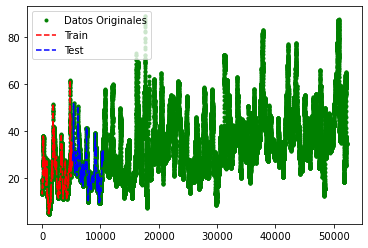

164/164 [==============================] - 1s 3ms/step


NameError: name 'spearman' is not defined

In [97]:
MSE=[]
R2=[]
for i in range(len(sets)-1):
    X_train,y_train,X_test,y_test=Set(i,Data_in,Data_out,0.7,True)
    model.fit(X_train,y_train,epochs=50,verbose=0)
    test_predictions=model.predict(X_test)
    MSE.append(mean_squared_error(y_test,test_predictions))
    rr,pr2=spearman(y_test,test_predictions)
    R2.append(rr)
    plt.plot(y_test,color='brown')
    plt.plot(test_predictions,color='pink')
    plt.show()

In [98]:
print('MSE promedio:',np.mean(MSE))
print('R2 promedio:',np.mean(R2))

MSE promedio: 0.009148041951511433
R2 promedio: nan


C:\Users\victo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\victo\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
